{'whiskers': [<matplotlib.lines.Line2D at 0x1bb2e248a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb2e24a410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb2e23bc90>,
 'medians': [<matplotlib.lines.Line2D at 0x1bb2e24bb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1bb2e258710>,
 'means': []}

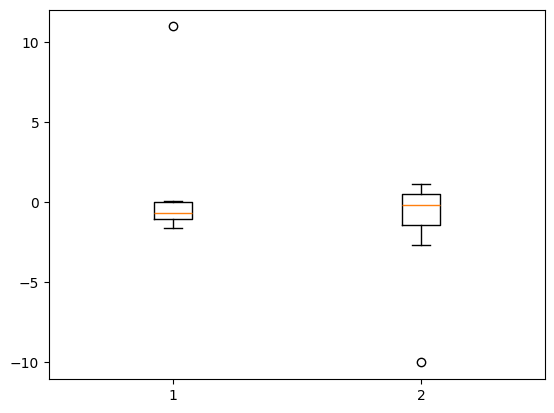

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(8, 3), columns=['C1', 'C2', 'C3'])
df.loc[1, 'C1']=11
df.loc[3, 'C3']=-10

plt.boxplot([df['C1'],df['C3']])

In [3]:
import pandas as pd

filename = r'C:\\sqlite\\mysql\\code\\07_1\\file\\medical.csv'
df = pd.read_csv(filename, encoding='cp949')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [8]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [9]:
df = df[df['Age'] >= 0]

In [10]:
df['No-show'].value_counts()

No-show
No     88207
Yes    22319
Name: count, dtype: int64

In [11]:
df['ScheduledDay'] =pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] =pd.to_datetime(df['AppointmentDay'])

In [12]:
df['waiting_day'] = df['AppointmentDay'].dt.day_of_year-df['ScheduledDay'].dt.day_of_year

In [13]:
df = df[df.waiting_day>=0] 

In [14]:
df['waiting_day'].min()

0

In [15]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [16]:
df = df[df.Age<=110] 

<Axes: xlabel='Age'>

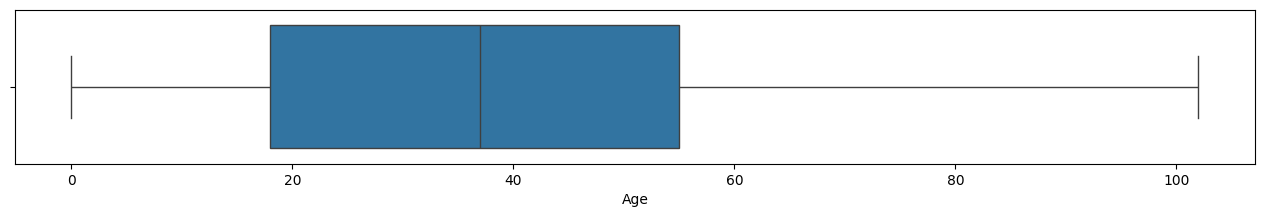

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,2))
sns.boxplot(x=df.Age)

<Axes: xlabel='Age'>

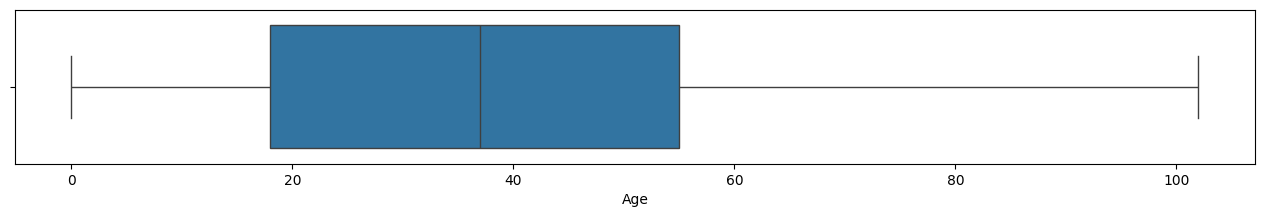

In [18]:
df=df[df.Age<=110]
plt.figure(figsize=(16,2))
sns.boxplot(x=df.Age)

In [19]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99], dtype=int64)

In [20]:
a=df[df.waiting_day==0]['waiting_day'].value_counts()
b=df[(df['waiting_day']==0)&(df['No-show']==1)]['waiting_day'].value_counts()
b/a

waiting_day
0   NaN
Name: count, dtype: float64

In [21]:
no_show=df[df['No-show']==1]
show=df[df['No-show']==0]

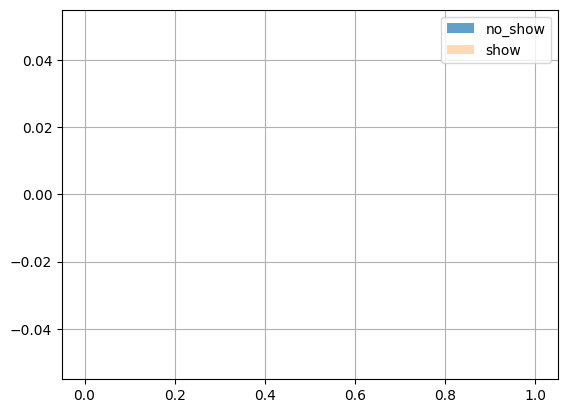

In [22]:
no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='no_show')
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='show')
plt.legend()

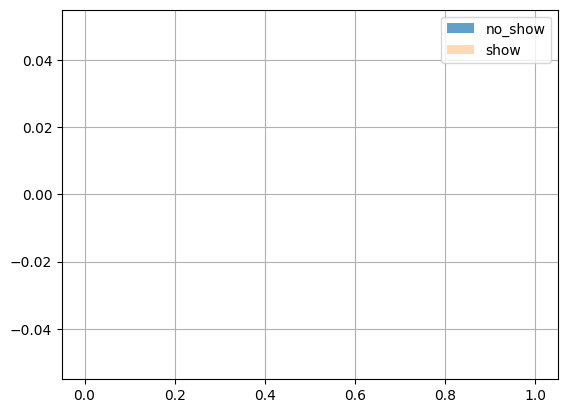

In [23]:
no_show['ScheduledDay'].hist(alpha=0.7,label='no_show')
show['ScheduledDay'].hist(alpha=0.3,label='show')
plt.legend()

In [24]:
df['PatientId'].value_counts().iloc[:10]

PatientId
8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: count, dtype: int64

<Axes: >

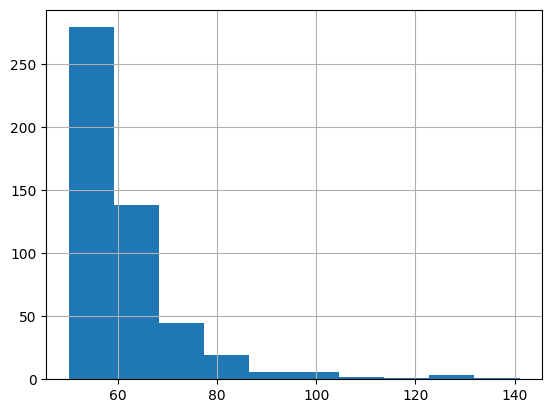

In [25]:
df['PatientId'].value_counts().iloc[:500].hist()

In [26]:
df[(df['waiting_day']>=50) & (df['No-show']==1)].PatientId.value_counts().iloc[:10]

Series([], Name: count, dtype: int64)

<Axes: xlabel='SMS_received', ylabel='waiting_day'>

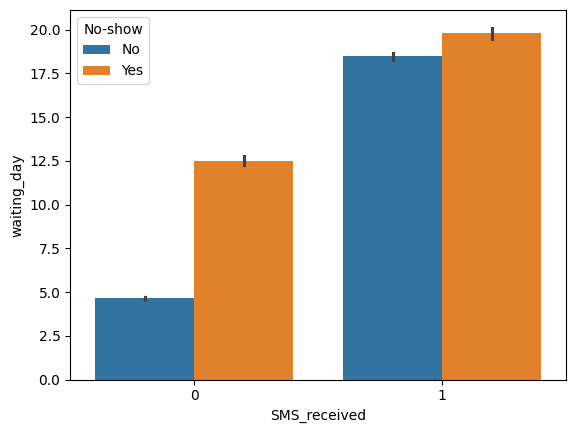

In [36]:
sns.barplot(y='waiting_day', x='SMS_received', hue='No-show', data=df)

In [38]:
temp=df[['waiting_day','SMS_received','No-show']].corr()
sns.heatmap(temp)

ValueError: could not convert string to float: 'No'